In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle
#from injections import 

In [2]:
BBH_path='data'
BNS_path='data2'
BBH_check_path='data_check'
BNS_check_path='data2_check'

In [3]:
injections_BNS = pickle.load(open(BNS_path+'/injections-BNS.p', "rb"))
injections_BBH = pickle.load(open(BBH_path+'/injections-BBH.p', "rb"))
injections_check_BNS = pickle.load(open(BNS_check_path+'/injections-BNS.p', "rb"))
injections_check_BBH = pickle.load(open(BBH_check_path+'/injections-BBH.p', "rb"))

In [4]:
mass_1=np.array([])
mass_2=np.array([])
mass_1_check=np.array([])
mass_2_check=np.array([])
identity=np.array([],dtype=bool)
identity_check=np.array([],dtype=bool)
num_injections=len(injections_BNS)+len(injections_BBH)
num_injections_check=len(injections_check_BNS)+len(injections_check_BBH)

for i in range(len(injections_BNS)):
    mass_1=np.append(mass_1,injections_BNS[i]["mass_1"])
    mass_2=np.append(mass_2,injections_BNS[i]["mass_2"])
    identity=np.append(identity,True)

for i in range(len(injections_BBH)):
    mass_1=np.append(mass_1,injections_BBH[i]["mass_1"])
    mass_2=np.append(mass_2,injections_BBH[i]["mass_2"])
    identity=np.append(identity,False)
    
for i in range(len(injections_check_BNS)):
    mass_1_check=np.append(mass_1_check,injections_check_BNS[i]["mass_1"])
    mass_2_check=np.append(mass_2_check,injections_check_BNS[i]["mass_2"])
    identity_check=np.append(identity_check,True)

for i in range(len(injections_check_BBH)):
    mass_1_check=np.append(mass_1_check,injections_check_BBH[i]["mass_1"])
    mass_2_check=np.append(mass_2_check,injections_check_BBH[i]["mass_2"])
    identity_check=np.append(identity_check,False)

In [5]:
M_chirp=(mass_1*mass_2)**(3/5)/(mass_1+mass_2)**(1/5)
eta=(mass_1*mass_2)/(mass_1+mass_2)**2.0

M_chirp_check=(mass_1_check*mass_2_check)**(3/5)/(mass_1_check+mass_2_check)**(1/5)
eta_check=(mass_1_check*mass_2_check)/(mass_1_check+mass_2_check)**2.0

In [6]:
# For now we have 2features, so let's use 2N+1 neighbors
num_neighbors = 5
KNC = KNeighborsClassifier(num_neighbors)

In [7]:
X_train = np.array([M_chirp,eta])
Y_train = identity

print(X_train)
print(Y_train)

X_train=np.reshape(X_train,(num_injections,2))

X_train.shape, Y_train.shape

[[ 1.11517732  1.27435042  1.31728931  1.03674033  1.16940107  1.07080856
   1.15899711  1.26005789  1.04290961  1.16268526  1.20381869  1.04822215
   1.12819129  1.24832397  1.04984739  1.26647736  1.17182152  1.19162864
   1.22309244  1.10108386  1.18075338  1.25344761  1.06015737  1.31438586
   1.28557651  1.19679612  1.2295786   1.09275829  1.2952859   1.22908994
   1.15636168  1.19127425  1.09667306  1.25882388  1.02491625  1.24848678
   1.12075978  1.01268846  1.22392549  1.27235847  1.09068224  1.01375755
   1.18834001  1.15725502  1.06263314  1.02710093  1.24727625  1.015645
   1.16897904  1.27498988  1.15117717  1.26127536  1.12748988  1.22011952
   1.05826397  0.91664972  1.08560863  1.37230802  1.01047611  1.01667811
   1.10934902  1.02330661  1.1924749   1.05656912  1.16678765  1.1173331
   1.06342787  1.12105594  1.04663489  1.21951155  1.14626094  1.17216307
   1.21151374  1.14308168  1.07215447  1.25534078  1.07367141  1.16279836
   1.19469934  1.30034147  1.28397728  1.

((200, 2), (200,))

In [8]:
KNC.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
X_check=np.array([M_chirp_check,eta_check])
print(len(X_check[0]))
Y_check= identity_check
X_check=np.reshape(X_check,(num_injections_check,2))
    
real_sol=KNC.predict(X_check)
#print(Y_check,real_sol)

Comparison=[Y_check==real_sol]
ind=[~Y_check==real_sol]
num_right=np.sum(Comparison)
    
print(Comparison)
#ind=np.where(X_check[Comparison])
print(X_check[ind])
frac_right=num_right/num_injections_check
    
#tot_num_right=tot_num_right+num_right
print(frac_right)


#print(tot_num_right/(checks*check_points))

200
[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  

/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


In [16]:
data={'M_chirp' : M_chirp,'eta' : eta, 'identity' : identity}
datapanda=pd.DataFrame(data=data)

data_check={'M_chirp' : M_chirp_check,'eta' : eta_check, 'identity' : identity_check}
datapanda_check=pd.DataFrame(data=data_check)

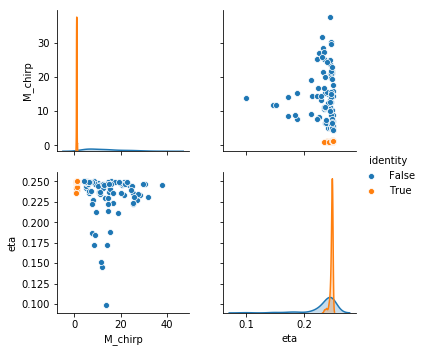

In [12]:
pairplots = sns.pairplot(datapanda,vars=['M_chirp','eta'],hue='identity',diag_kind='auto')

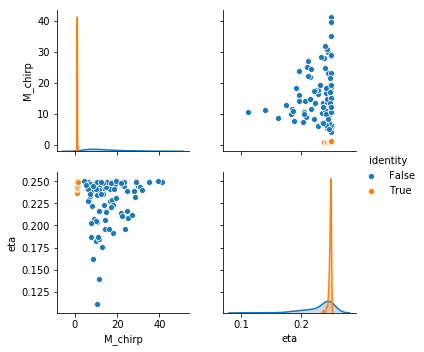

In [18]:
pairplots_check = sns.pairplot(datapanda_check,vars=['M_chirp','eta'],hue='identity',diag_kind='auto')